## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [62]:
#scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza 
# % di volte che è uscita testa
import numpy as np

def lancio_moneta(N):

    lanci = np.random.choice([0, 1], size=N)
    frequenza_teste = np.mean(lanci) * 100

    return frequenza_teste

In [63]:
#Calcolare la frequenza % con la grandezze del campione (numero di lanci) 
# che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
campioni = np.linspace(10, 20000, 100, dtype=int) #mi fornisce 100 grandezze del campione 
frequenze_teste = [] #lista vuota

for N in campioni:
    frequenze_teste.append(lancio_moneta(N))

print(frequenze_teste)
#le frequenze al crescere di N tendono al 50%

[np.float64(70.0), np.float64(52.60663507109005), np.float64(52.05811138014528), np.float64(49.91869918699187), np.float64(49.57160342717258), np.float64(48.67517173699706), np.float64(49.385749385749385), np.float64(51.51089248067463), np.float64(47.93846153846154), np.float64(48.93267651888342), np.float64(48.15179891572203), np.float64(49.843119677274764), np.float64(51.50020550760378), np.float64(49.54441913439636), np.float64(47.70803949224259), np.float64(50.23041474654379), np.float64(51.882716049382715), np.float64(50.66821615339918), np.float64(49.149286498353455), np.float64(51.508060322412895), np.float64(51.77865612648221), np.float64(49.858823529411765), np.float64(50.943396226415096), np.float64(49.61323592608509), np.float64(51.11202635914333), np.float64(50.227407553885705), np.float64(50.465868035748244), np.float64(50.466947445522806), np.float64(50.62687621402083), np.float64(50.28132992327365), np.float64(49.975276083731664), np.float64(49.43372148668049), np.float6

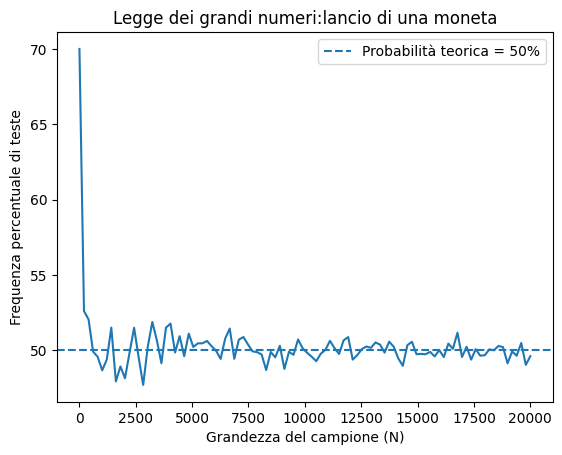

In [64]:
#Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(campioni, frequenze_teste)
#traccio la probabilità teorica
plt.axhline(50, linestyle='--', label='Probabilità teorica = 50%')

plt.xlabel('Grandezza del campione (N)')
plt.ylabel('Frequenza percentuale di teste')
plt.title('Legge dei grandi numeri:lancio di una moneta')
plt.legend()

plt.show()



## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [65]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
#quante righe e colonne ha il dataset
df.shape

(891, 12)

In [67]:
#valori mancanti per colonna
#isnull() ritorna valori booleani
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
#riempire i valori mancanti di Embarked con il valore più frequente
moda = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(moda)
df['Embarked'] 

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [69]:
#rimuovere le righe con Age mancante
df = df.dropna(subset=['Age'])
#verifico che non ci siano valori NaN
df['Age'].isnull().sum()

np.int64(0)

In [70]:
#controllo le righe duplicate
df.duplicated().sum()

np.int64(0)

In [71]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [74]:
type(df) #pandas.core.frame.DataFrame
#Calcola l'età media dei passeggeri per ogni classe (Pclass)
#creo un oggetto GroupBy
grouped = df.groupby('Pclass')
#sovrascrivo il dataframe con il risultato di groupby
eta_media = grouped['Age'].mean()
print(eta_media)

# se ci sono valori mancanti di età riempili con il valore medio
media = df['Age'].mean()
df['Age'] = df['Age'].fillna(media)


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


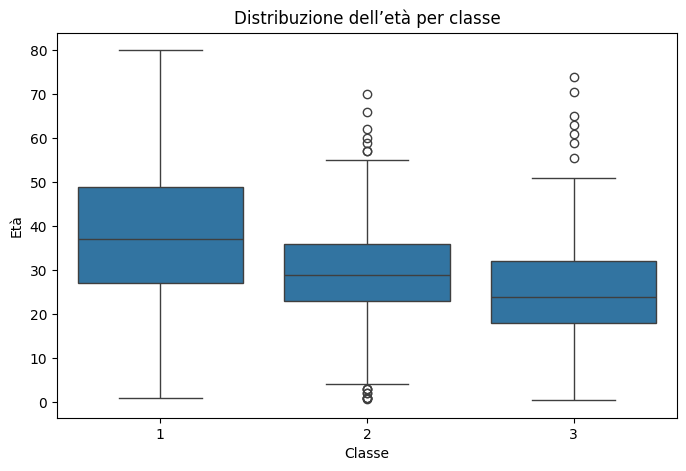

In [76]:
#Visualizza la distribuzione dell'età per classe
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribuzione dell’età per classe')
plt.xlabel('Classe')
plt.ylabel('Età')
plt.show()

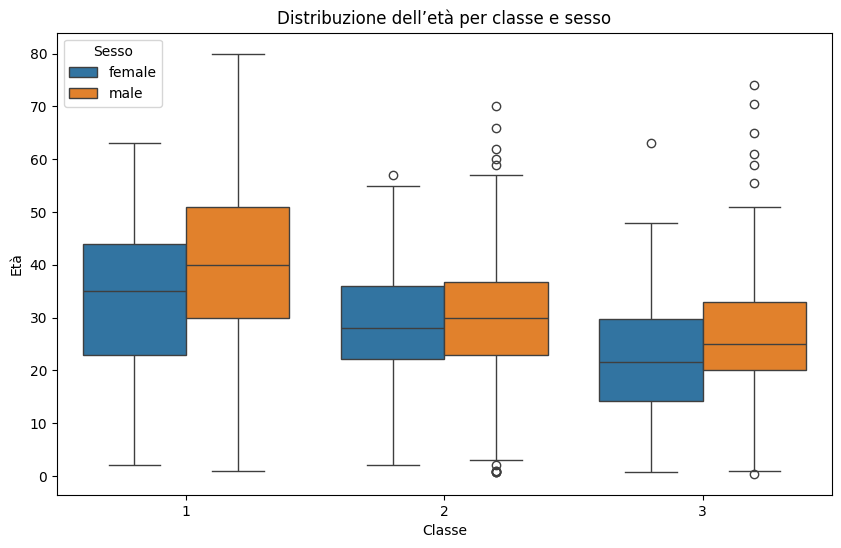

In [78]:
#Visualizza la distribuzione dell'età per classe 
#dividendo e mmostrando insieme i dati di uomini e donne
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title('Distribuzione dell’età per classe e sesso')
plt.xlabel('Classe')
plt.ylabel('Età')
plt.legend(title='Sesso')
plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [83]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [85]:
#Calcola la lunghezza e la larghezza media dei petali per specie
grouped = df.groupby('species')
petali_valori = grouped[['petal_length', 'petal_width']].mean()
print(petali_valori)

            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


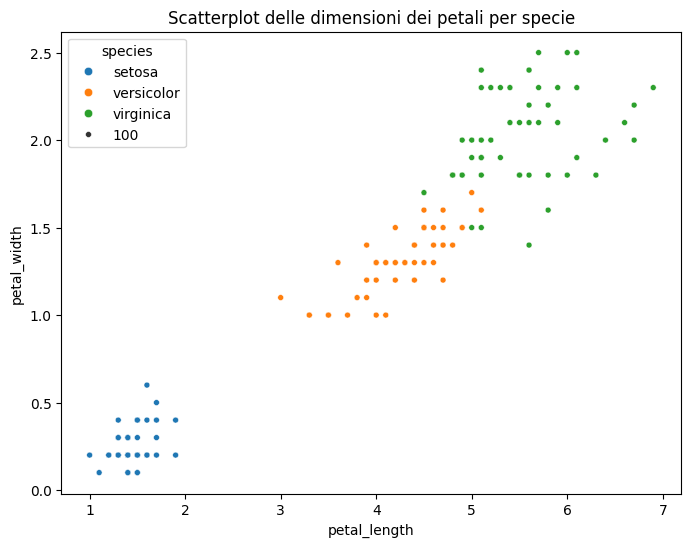

In [91]:
#Visualizza le dimensioni dei petali per specie (scatterplot)
plt.figure(figsize=(8,6))
sns.scatterplot (data=df, x='petal_length', y='petal_width', hue='species', size=100)
plt.title("Scatterplot delle dimensioni dei petali per specie")
plt.show()

In [ ]:
#Crea una nuova colonna per l'area del petalo e analizzala

df['area_petalo'] = df['petal_length'] * df['petal_width']

grouped = df.groupby('species')
area_info = grouped['area_petalo'].describe()
area_info

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,0.3656,0.181155,0.11,0.2800,0.300,0.42,0.96
versicolor,50.0,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
virginica,50.0,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


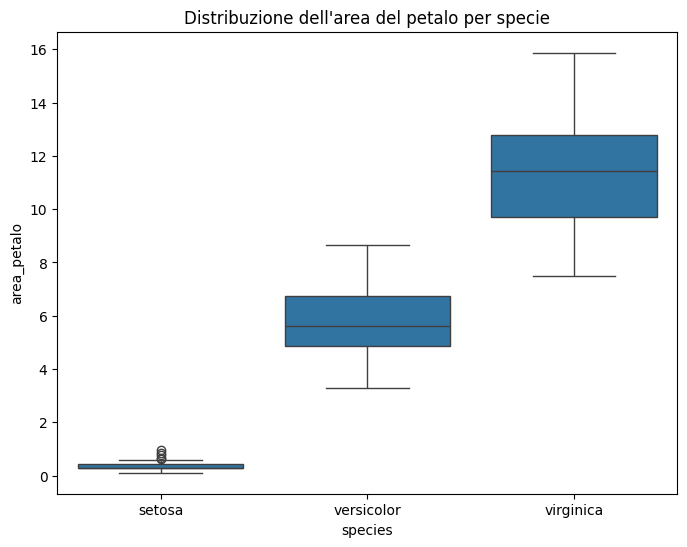

In [100]:
##Grafico della distribuzione dell'area del petalo per specie (boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='species', y='area_petalo')
plt.title("Distribuzione dell'area del petalo per specie")
plt.show()

